# Media Company Case Study

## Multiple Linear Regression

### Problem Statement:
A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.


### Approach:
We are concerned about determining the driver variable for show viewership. This is the case of prediction rather than projection where we are more interested in predicting the key driver variables and their impact rather than forcasting the results.

First we will list down the potential reasons for the decline in viewershp.<br>

The potential reasons could be:
1. Decline in the number of people coming to the platform
2. Fewer people watching the video
3. A Decrease in marketing spend?
4. Competitive shows, e.g. cricket/ IPL
5. Special holidays
6. Twist in the story


### Data
We have been given data for the period of 1 March 2017 to 19 May 2017.<br>
With Columns as<br> 
Views_show         : Number of times the show was viewed<br>
Visitors           : Number of visitors who browsed the platform, but not necessarily watched a video.<br>
Views_platform	   : Number of times a video was viewed on the platform<br>
Ad_impression	   : Proxy for marketing budget. Represents number of impressions generated by ads<br>
Cricket_match_india: If a cricket match was being played. 1 indicates match on a given day, 0 indicates there wasn't<br>
Character_A        : Describes presence of Character A. 1 indicates character A was in the episode, 0 indicates she/he wasn't

In [60]:
# Importing base libraries
import numpy as np
import pandas as pd

# Importing data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Supresses warnings
import warnings
warnings.filterwarnings('ignore')

# Machine Learnign Library
import statsmodels.api as sm

# Reading & understanding data

In [5]:
media = pd.read_csv("mediacompany.csv")
media

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN
...,...,...,...,...,...,...,...,...
75,5/15/2017,313945,1808684,2226788,1398052759,1,0,NaN
76,5/16/2017,185689,1814227,2199844,1311961223,1,0,NaN
77,5/17/2017,142260,1755803,2225752,1248266254,1,0,NaN
78,5/18/2017,135871,1749654,2302789,1284859759,1,0,NaN


In [6]:
del media['Unnamed: 7']

In [7]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [8]:
media.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
75,5/15/2017,313945,1808684,2226788,1398052759,1,0
76,5/16/2017,185689,1814227,2199844,1311961223,1,0
77,5/17/2017,142260,1755803,2225752,1248266254,1,0
78,5/18/2017,135871,1749654,2302789,1284859759,1,0
79,5/19/2017,108961,1746735,2279036,1246026846,1,0


# Data inspection

In [9]:
media.shape

(80, 7)

In [10]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [11]:
media[['Views_show','Visitors','Views_platform','Ad_impression']].describe()

,Views_show,Visitors,Views_platform,Ad_impression
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09


# Data Cleaning

In [13]:
# checking null values
media.isnull().sum()

Date                   0
Views_show             0
Visitors               0
Views_platform         0
Ad_impression          0
Cricket_match_india    0
Character_A            0
dtype: int64

In [14]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


<Axes: >

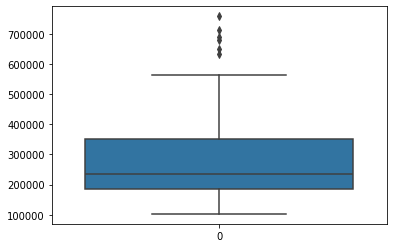

In [15]:
sns.boxplot(media['Views_show'])

<Axes: >

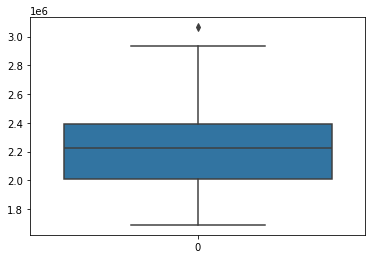

In [16]:
sns.boxplot(media['Views_platform'])

<Axes: >

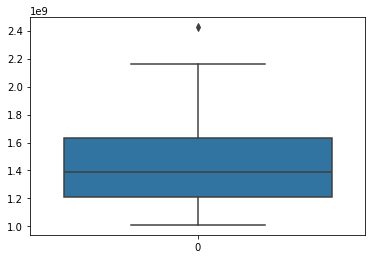

In [17]:
sns.boxplot(media['Ad_impression'])

<Axes: >

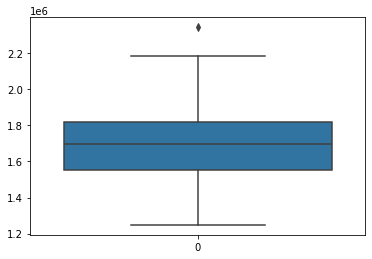

In [18]:
sns.boxplot(media['Visitors'])

In [19]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [20]:
media.dtypes

Date                   object
Views_show              int64
Visitors                int64
Views_platform          int64
Ad_impression           int64
Cricket_match_india     int64
Character_A             int64
dtype: object

In [22]:
media['Date'] = pd.to_datetime(media['Date'])
media.dtypes

Date                   datetime64[ns]
Views_show                      int64
Visitors                        int64
Views_platform                  int64
Ad_impression                   int64
Cricket_match_india             int64
Character_A                     int64
dtype: object

In [23]:
media['Day_of_week'] = media['Date'].dt.dayofweek

In [24]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6


# Exploratory Data Analysis

In [ ]:
# target variable - views_show

<Axes: >

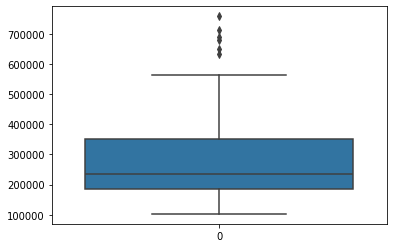

In [26]:
sns.boxplot(media['Views_show'])

<Axes: xlabel='Date'>

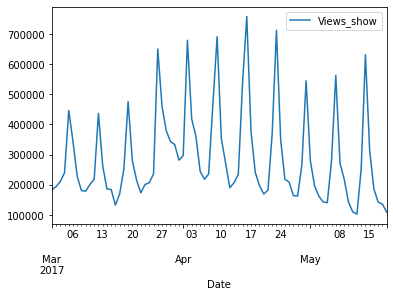

In [27]:
# find the trend of views by date!
# 'Date', 'Views_show'
media.plot.line(x = 'Date',y='Views_show')

In [ ]:
#  inference : there's some pattern in the data

In [ ]:
# day of week --> views on each weekday?

In [28]:
media.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'Day_of_week'],
      dtype='object')

<Axes: xlabel='Day_of_week', ylabel='Views_show'>

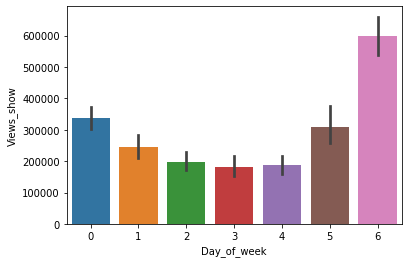

In [29]:
sns.barplot(data=media,x = 'Day_of_week',y ='Views_show')

In [ ]:
# weekend more views, weekday less views

In [32]:
# Weekday/weekend flag?
di = {5:1,6:1,0:0, 1:0, 2:0, 3:0, 4:0}
media['weekend'] = media['Day_of_week'].map(di)

In [33]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,1


<Axes: xlabel='weekend', ylabel='Views_show'>

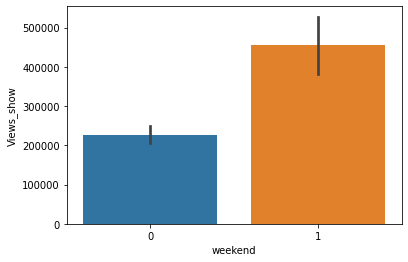

In [34]:
# weekend vs weekday views?
sns.barplot(data=media,x = 'weekend',y ='Views_show')

In [35]:
# viewership is higher on the weekends!

In [39]:
media.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'Day_of_week', 'weekend'],
      dtype='object')

<Axes: xlabel='Ad_impression', ylabel='Views_show'>

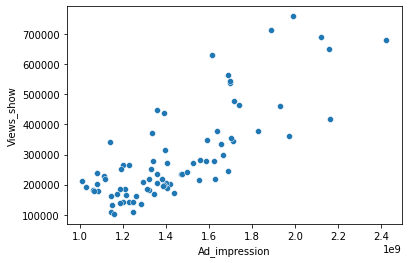

In [40]:
# 1) Ad impression, views_shows (numerical : scatter plot)
sns.scatterplot(data=media,x = 'Ad_impression', y ='Views_show')

<Axes: xlabel='Visitors', ylabel='Views_show'>

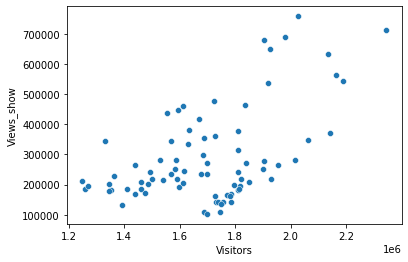

In [44]:
# 2) Visitors, views_shows (ScatterPlot)
sns.scatterplot(data=media,x = 'Visitors', y ='Views_show')

<Axes: xlabel='Views_platform', ylabel='Views_show'>

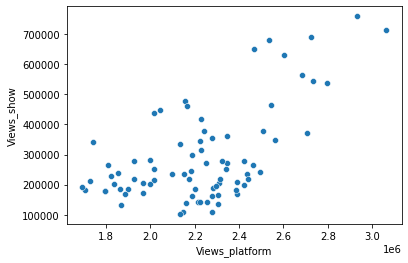

In [45]:
# 3) Views_platform, views_shows (ScatterPlot)
sns.scatterplot(data=media,x = 'Views_platform', y ='Views_show')

In [46]:
media.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'Day_of_week', 'weekend'],
      dtype='object')

<Axes: xlabel='Cricket_match_india', ylabel='Views_show'>

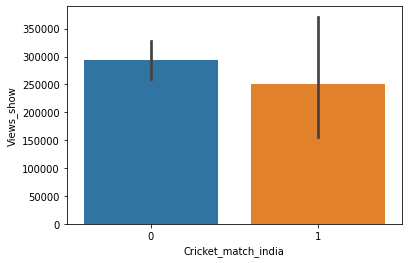

In [47]:
# 4) India Match,views_shows (barplot)
sns.barplot(data = media,x="Cricket_match_india",y="Views_show")

<Axes: xlabel='Character_A', ylabel='Views_show'>

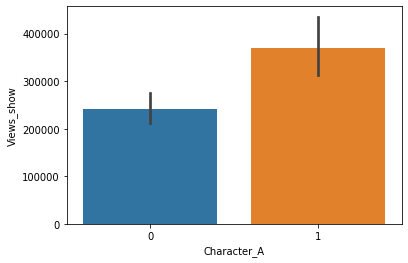

In [48]:
# 5) Character A,views_shows (barplot)
sns.barplot(data = media,x="Character_A",y="Views_show")

In [50]:
media[['Views_show', 'Visitors',
        'Views_platform', 'Ad_impression']].corr()

,Views_show,Visitors,Views_platform,Ad_impression
Views_show,1.000000,0.535290,0.604279,0.785673
Visitors,0.535290,1.000000,0.935832,0.478598
Views_platform,0.604279,0.935832,1.000000,0.587003
Ad_impression,0.785673,0.478598,0.587003,1.000000


<Axes: >

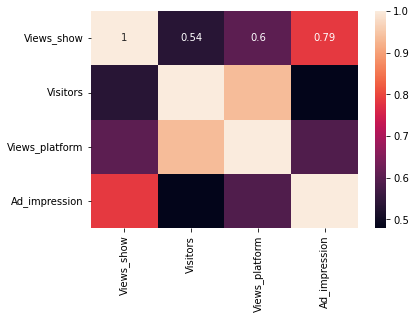

In [51]:
sns.heatmap(media[['Views_show', 'Visitors',
        'Views_platform', 'Ad_impression']].corr(),annot=True)

In [ ]:
# date - 
# week , weekend/weekday (done!)
# year, month, quarter (do more analysis)

# date vs char A with views_shows
# date vs india match with views shows

In [54]:
media.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'Day_of_week', 'weekend'],
      dtype='object')

In [57]:
# ML : 

In [ ]:
# Model 1 :

In [65]:
X = media[['Visitors', 'Views_platform', 'Ad_impression']]
y = media['Views_show']
X = sm.add_constant(X)
lr1 = sm.OLS(y,X).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     47.21
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           2.47e-17
Time:                        14:27:14   Log-Likelihood:                -1027.0
No. Observations:                  80   AIC:                             2062.
Df Residuals:                      76   BIC:                             2071.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -4.66e+05   8.13e+04     -5.

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     47.21
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           2.47e-17
Time:                        14:24:48   Log-Likelihood:                -1027.0
No. Observations:                  80   AIC:                             2062.
Df Residuals:                      76   BIC:                             2071.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -4.66e+05   8.13e+04     -5.

In [64]:
# p values > 0.05 --> insignificant!

In [67]:
# Model 2
media.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'Day_of_week', 'weekend'],
      dtype='object')

In [70]:
X = media[['Visitors', 'Views_platform', 'Ad_impression',
          'Cricket_match_india', 'Character_A','weekend','Day_of_week']]
y = media['Views_show']
X = sm.add_constant(X)
lr2 = sm.OLS(y,X).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     48.43
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           9.60e-25
Time:                        14:29:58   Log-Likelihood:                -999.39
No. Observations:                  80   AIC:                             2015.
Df Residuals:                      72   BIC:                             2034.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.475e+05   7